### End-to-End diabetic disease prediction

***steps involved***
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation


#### Problem Definition
> Given a clinical parameters about a patient, whether a patient is diabetic or not?

#### Data
The original data is available on UCI machine learning repository.

https://archive.ics.uci.edu/ml/datasets/diabetes
There is also a version of it available on kaggle.
https://www.kaggle.com/ealtintas/uci-machine-learning-repository-diabetes-data-set

#### Evaluation
> can we reach upto a certin percentage of accuracy, in predicting whether or not a patient have a diabetic disease.

#### Features

This where we can get the information about ecah attribute/feature in our dataset.


***we usually create a dictionary of features***
  (BMI)=body mass index
    rest are the known attributies in our dataset like
    pregnencies,age,bloodpreasure etc




## prepearing the tools
we will use the pandas, numpy and matplotlib for data analysis and manipulation


In [1]:
# import libraries for data analysis and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve




In [2]:
db_disease = pd.read_csv('diabetes.csv')


In [4]:
db_disease.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db_disease.shape

(768, 9)

In [6]:
db_disease['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

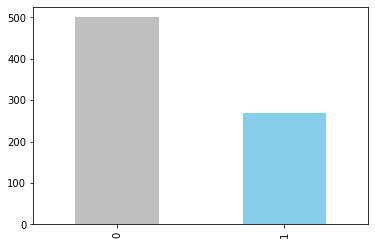

In [7]:
db_disease['Outcome'].value_counts().plot(kind='bar',color=['silver','skyblue']);

In [8]:
#lets get some information about our dataset and its attributes
db_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#lets check how many values are null in our dataset for each attribute
db_disease.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#lets get some statistical values of our dataset
db_disease.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


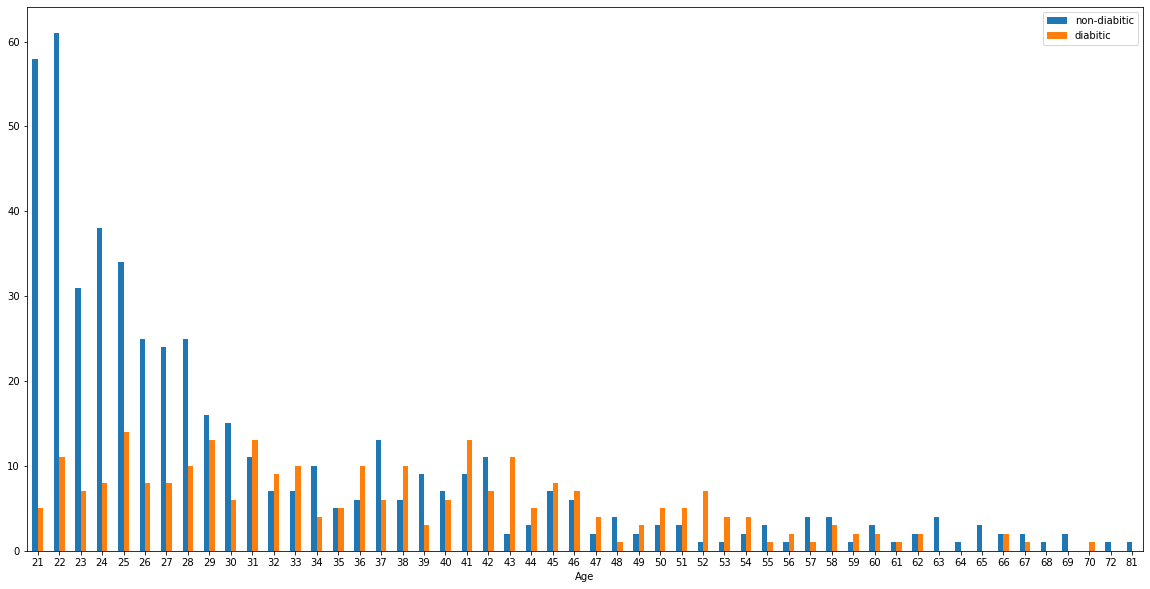

In [11]:
pd.crosstab(db_disease.Age,db_disease.Outcome).plot(kind='bar',figsize=(20,10))
plt.xticks(rotation=0)
plt.legend(['non-diabitic','diabitic']);

#### the above graph didn't look good for the bar plotting, not so much informative so we will try age vs ,  blood preasure with a scatter plot


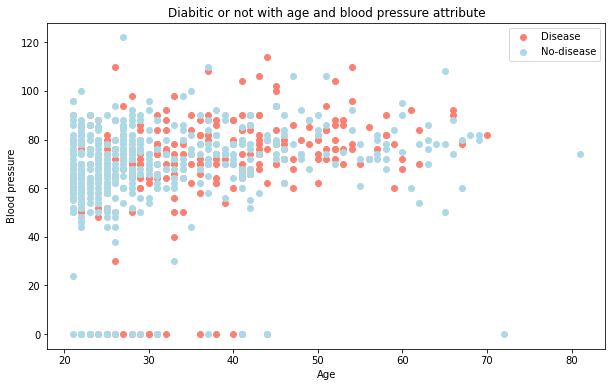

In [12]:
plt.figure(figsize=(10,6))
# positive for diabitic
plt.scatter(db_disease.Age[db_disease['Outcome']==1],
            db_disease.BloodPressure[db_disease['Outcome']==1],
           c='salmon')
# negative for diabities
plt.scatter(db_disease.Age[db_disease['Outcome']==0],
            db_disease.BloodPressure[db_disease['Outcome']==0],
           c='lightblue')
plt.xlabel('Age')
plt.ylabel('Blood pressure')
plt.title('Diabitic or not with age and blood pressure attribute')
plt.legend(['Disease','No-disease']);
                           

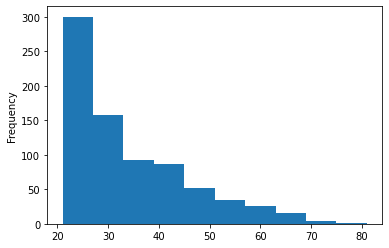

In [13]:
db_disease.Age.plot.hist();

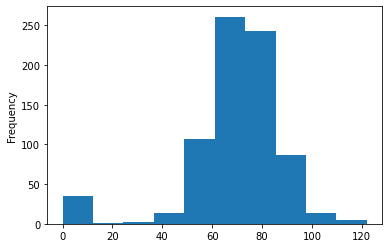

In [14]:
db_disease.BloodPressure.plot.hist();

In [15]:
db_disease['Age'][db_disease["Age"]<24
                 ].value_counts()

22    72
21    63
23    38
Name: Age, dtype: int64

In [16]:
db_disease.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
db_disease.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [18]:
db_disease.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [19]:
pd.crosstab(db_disease.Pregnancies,db_disease.Outcome)

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


<Figure size 720x720 with 0 Axes>

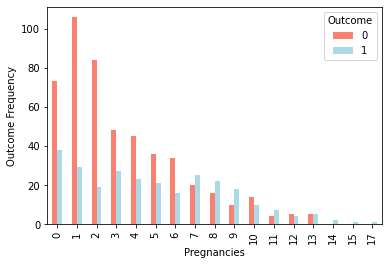

In [20]:
plt.figure(figsize=(10,10))
pd.crosstab(db_disease.Pregnancies,db_disease.Outcome).plot(kind='bar',color=['salmon','lightblue'])
plt.ylabel('Outcome Frequency');

In [21]:
corelation_matr=db_disease.corr()

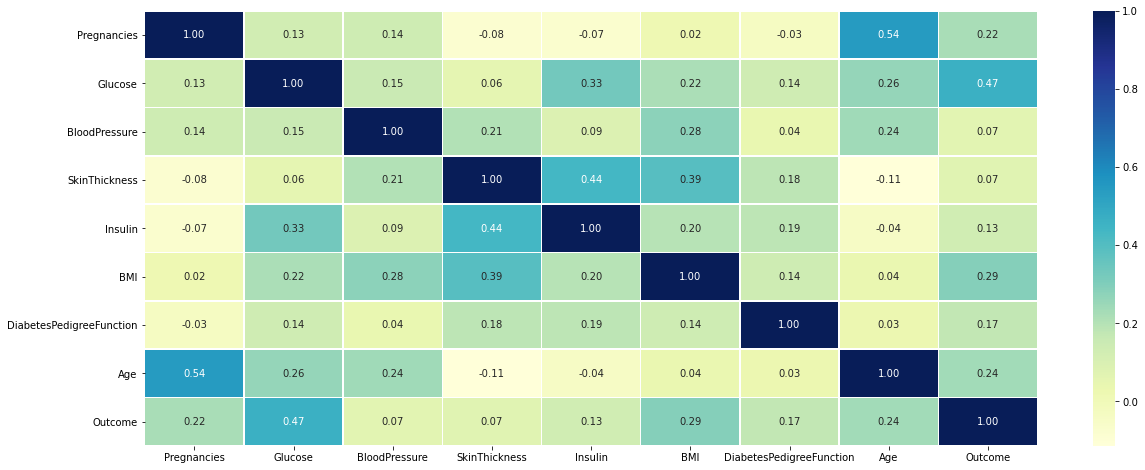

In [22]:
fig,ax = plt.subplots(figsize=(20,8))
ax=sns.heatmap(corelation_matr,
              annot=True,
              fmt='.2f',
              linewidths=0.5,
              cmap='YlGnBu');


In [23]:
corelation_matr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Moodeling

In [24]:
db_disease.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
x=db_disease.drop('Outcome',axis=1)
y=db_disease['Outcome']

In [26]:
# split our data into train and test set
np.random.seed(2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124,74,36,0,27.8,0.100,30
429,1,95,82,25,180,35.0,0.233,43
623,0,94,70,27,115,43.5,0.347,21
209,7,184,84,33,0,35.5,0.355,41
589,0,73,0,0,0,21.1,0.342,25
...,...,...,...,...,...,...,...,...
534,1,77,56,30,56,33.3,1.251,24
584,8,124,76,24,600,28.7,0.687,52
493,4,125,70,18,122,28.9,1.144,45
527,3,116,74,15,105,26.3,0.107,24


In [28]:
y_train

602    0
429    1
623    0
209    1
589    0
      ..
534    0
584    1
493    1
527    0
168    0
Name: Outcome, Length: 614, dtype: int64

In [29]:
# lets make a dictionary of models
model_dict = {'LogesticRegression':LogisticRegression(),
             'KNN':KNeighborsClassifier(),
             'RandomForest':RandomForestClassifier()}
#lets maek a fuction to fit models in dictionary and find scores.

def fit_and_score(model_dict,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={} #empty dictionary to store the results.
    #loop through models
    for name,model in model_dict.items():
        model.fit(x_train,y_train)
        # evaluate the score and store in model_score:
        model_score[name] = model.score(x_test,y_test)
    return model_score
    
    

In [30]:
model_scores = fit_and_score(model_dict=model_dict,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test
                            )
model_scores

C:\Users\SyedTawseef\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogesticRegression': 0.7662337662337663,
 'KNN': 0.7272727272727273,
 'RandomForest': 0.7467532467532467}

### Model comparison

In [31]:
model_compare = pd.DataFrame(model_scores,index=['Accuray'])

In [32]:
model_compare

,LogesticRegression,KNN,RandomForest
Accuray,0.766234,0.727273,0.746753


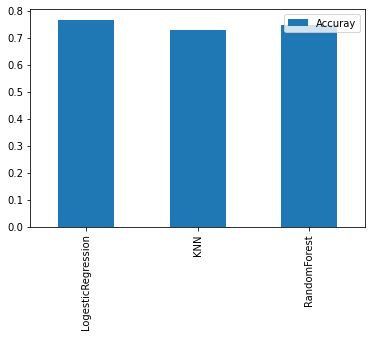

In [33]:
model_compare.T.plot(kind='bar');

### Tuning/Improving model

In [34]:
train_score=[]
test_score=[]
neighbours =range(1,21)
for i in neighbours:
    
    knn=KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))
    

In [35]:
max(train_score)

1.0

In [36]:
max(test_score)

0.7987012987012987

The maximum test score for knn is : 79.87%


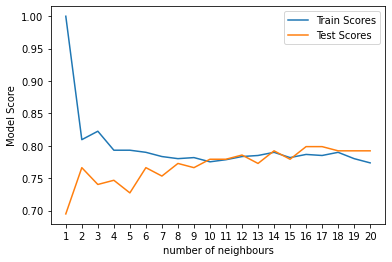

In [37]:
plt.plot(neighbours,train_score,label='Train Scores')
plt.plot(neighbours,test_score,label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('number of neighbours')
plt.ylabel('Model Score')
plt.legend();
print(f'The maximum test score for knn is : {max(test_score)*100:.2f}%' )

### tuning hypermeters with scikit-learns randomsearchcv and gridsearchcv


In [38]:
#create a grid for logesticregressor parameters
lr_grid={'C':np.logspace(-4,4,20),
        'solver':['liblinear']}

#create a grid for RandomForestclassifier parameters

rf_grid={'n_estimators':np.arange(10,1000,50),
        'max_depth':[None,3,5,10],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}



In [39]:
log_reg_cv=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=lr_grid,
                              cv=5,
                              n_iter=10,
                              verbose=True
                             );
log_reg_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
log_reg_cv.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [41]:
log_reg_cv.score(x_test,y_test)

0.7662337662337663

In [42]:
rf_cv=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=5,
                        verbose=True,
                        cv=5)
rf_cv.fit(x_test,y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   14.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rf_cv.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [44]:

rf_cv.score(x_test,y_test)

0.8311688311688312

### since RandomForestClassifier after RandomSearchCv provided an improved score of 83% therefore we will go for the GridSearchCV

In [45]:
rf_grid2 ={'n_estimators':[100,510,1000],
          'max_depth':[None,3],
          'min_samples_split':[18],
          'min_samples_leaf':np.arange(1,20,2)}

gs_cv = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid2,
                    cv=5,
                    verbose=True,)


In [46]:
gs_cv.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  4.9min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': [18],
                         'n_estimators': [100, 510, 1000]},
             verbose=True)

In [47]:
gs_cv.best_params_

{'max_depth': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 18,
 'n_estimators': 510}

In [48]:
gs_cv.score(x_test,y_test)

0.7727272727272727

In [49]:
improved_score = {'RandomSearchCv for RF':83.11,
                 'Gridsearchcv for RF':77.27}

In [50]:
df=pd.DataFrame(improved_score,index=['Accuracy'])

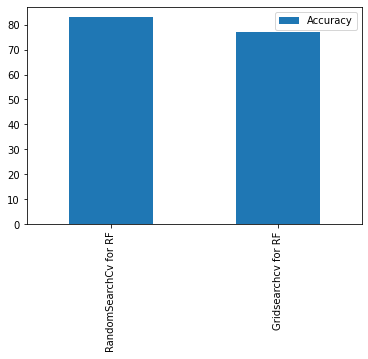

In [51]:
df.T.plot(kind='bar');

### lets plot a roc curve (receiver operating cherecteristic curve)

In [89]:
y_pred=rf_cv.predict(x_test)

In [90]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

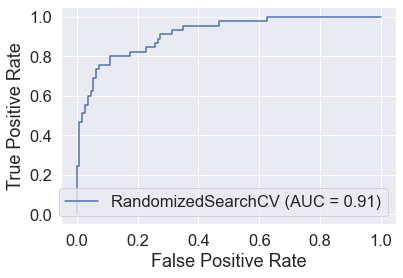

In [91]:
plot_roc_curve(rf_cv,x_test,y_test);

In [92]:
cf=confusion_matrix(y_test,y_pred)

In [93]:
cf

array([[108,   1],
       [ 25,  20]], dtype=int64)

In [94]:
def plot_con_mat(y_test,y_pred):
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(figsize=(6,5))
    ax=sns.heatmap(cf,
                  annot=True,
                  cbar=True)
    ax.set(xlabel='predicted label',
          ylabel='True label',
          title='confusion matrix')
    


    
    

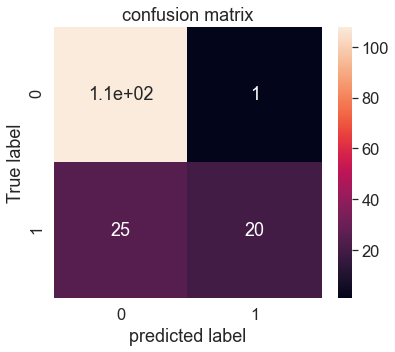

In [95]:
plot_con_mat(y_test,y_pred)

### lets get the classification report

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       109
           1       0.95      0.44      0.61        45

    accuracy                           0.83       154
   macro avg       0.88      0.72      0.75       154
weighted avg       0.85      0.83      0.81       154



# lets check now the cross validated score, accuracy, precision, recall and f1

In [97]:
rf_cv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [98]:
# cross validated accuray
cv_ac = cross_val_score(rf_cv,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   25.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   20.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   16.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   17.6s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   22.4s finished


In [100]:
cv_ac.mean()


0.7618029029793736

In [101]:
#lets do it another way by passing the best params for our model
rf_cv.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [102]:
clf=RandomForestClassifier(n_estimators=510,
                          min_samples_split=18,
                          min_samples_leaf=9,
                          max_depth=3)

In [103]:
cv_acc =cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy')

In [105]:
cv_acc.mean()

0.7643833290892115

In [107]:
cv_pre =cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='precision')

In [109]:
cv_pre.mean()

0.7486271233639655

In [110]:
cv_rec =cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='recall')

In [112]:
cv_rec

array([0.44444444, 0.46296296, 0.5       , 0.56603774, 0.47169811])

In [116]:
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')

In [118]:
cv_f1.mean()

0.5729334198150801

In [120]:
#lets visualize our cross validated scores for 5 fold(cv=5)
cv_dic = {'Accuracy':cv_acc,
         'Precision':cv_pre,
         'Recall':cv_rec,
         'F1_score':cv_f1}

cv_df = pd.DataFrame(cv_dic)

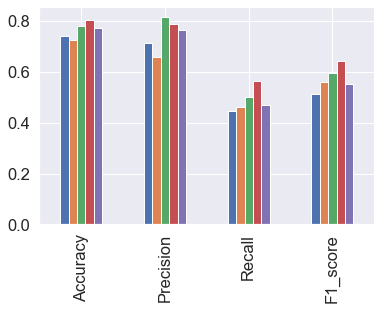

In [130]:
cv_df.T.plot(kind='bar',legend=False);


### lets check the feature importance 

In [131]:
rf_cv.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 9,
 'max_depth': 3}

In [132]:
clf

RandomForestClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=18,
                       n_estimators=510)

In [133]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=18,
                       n_estimators=510)

In [140]:
lr=LogisticRegression(C=11.288378916846883,solver='liblinear')


In [145]:
lr.fit(x_train,y_train)

LogisticRegression(C=11.288378916846883, solver='liblinear')

In [146]:
lr.coef_

array([[ 0.15867112,  0.03644159, -0.0141731 ,  0.00386379, -0.00130759,
         0.0811882 ,  0.97273431,  0.00528609]])

In [154]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=18,
                       n_estimators=510)

In [156]:
clf.feature_importances_

array([0.07267457, 0.40155263, 0.02669683, 0.04675953, 0.05727082,
       0.17893361, 0.07770123, 0.13841079])

now lets visualise our feature_importance_

In [157]:
db_disease.head()
#feature_dict = dict(zip())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
feature_dict = dict(zip(db_disease.columns,clf.feature_importances_))

In [159]:
feature_dict

{'Pregnancies': 0.07267457219510394,
 'Glucose': 0.4015526252415518,
 'BloodPressure': 0.026696826575276875,
 'SkinThickness': 0.04675953209282043,
 'Insulin': 0.05727081662174241,
 'BMI': 0.17893360962520216,
 'DiabetesPedigreeFunction': 0.0777012282429114,
 'Age': 0.13841078940539106}

In [160]:
feature_df = pd.DataFrame(feature_dict,index=[0])

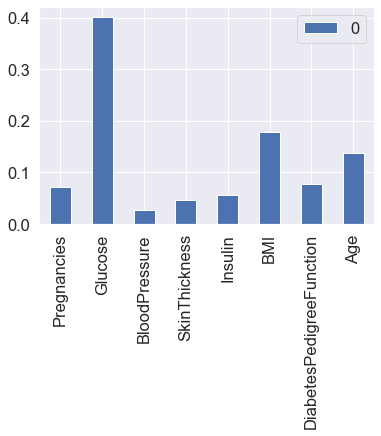

In [164]:
feature_df.T.plot(kind='bar');